# Lesson: Natural Language Processing - ACQUIRE - WEB SCRAPING

<a href = "https://www.canva.com/design/DAFl_9iaHIU/XGp0vYPPY6vsXZF70G9gCw/view?utm_content=DAFl_9iaHIU&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">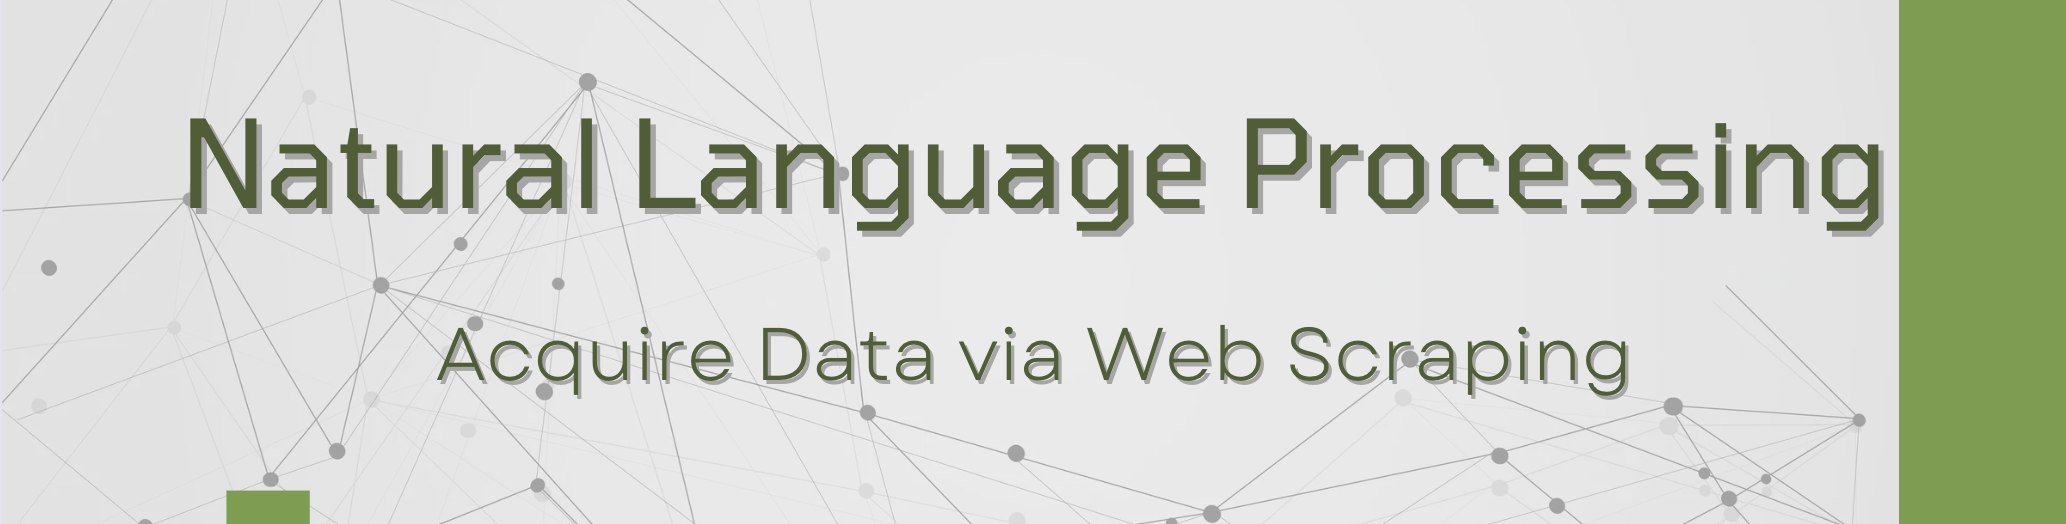</a>

<hr style="border:2px solid gray">

# Steps
## 1. Import the `get()` function from the `requests` module, `BeautifulSoup` from `bs4`, and `pandas`.
## 2. Assign the address of the web page to a variable named `url`.
## 3. Request the server the content of the web page by using `get()`, and store the server’s response in the variable `response`.
## 4. Print the response `text` to ensure you have an html page.
## 5. Take a look at the actual web page contents and inspect the source to understand the structure a bit.
## 6. Use BeautifulSoup to parse the HTML into a variable (`soup`).
## 7. Identify the key tags you need to extract the data you are looking for.

___

## Step 1.

In [ ]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd

import os
from pprint import pprint 

## Step 2 & 3.

In [ ]:
url = 'https://codeup.com/data-science/math-in-data-science/'
response = get(url)
response

### Some websites don't accept the pyhon-requests default user-agent and will return a **403 Forbidden** or **401 Unauthorized** status code. 
- This indicates that the server has understood the request but refuses to fulfill it, likely due to the unrecognized or blocked user-agent.

- You can modify the user-agent header in your requests to mimic a different user-agent, such as a web browser, and see if the website responds positively.

In [ ]:
requests.utils.default_headers()

In [ ]:
headers = {"User-Agent": "Chrome/91.0.4472.124"}
response = 
response

## Step 4.

In [ ]:
response

## Step 5.

Let's visit the <a href = "https://codeup.com/data-science/math-in-data-science/">blog's website</a> and apply the following Developer Tools to examine the HTML structure:
- `command + option + u` will let you view the source of a page in chrome.
- `command + option + i` will open up the chrome dev tools page inspector.
    - `command + shift + c` will turn on the ability to hover over elements to find their corresponding HTML code. 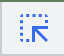
- Right clicking on specific text in the page and selecting 'inspect' will take you right to the html of that text


In [ ]:
pprint(response.content)

## <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/">Step 6.</a>

In [ ]:
# Make a soup variable holding the response content
soup = 
soup

## Step 7.

In [ ]:
soup.h1

In [ ]:
soup.h1.text

In [ ]:
soup.p

In [ ]:
soup.find('p')

In [ ]:
soup.find_all('p')

In [ ]:
list_of_p_elements = 
list_of_p_elements

### <a href = "https://developer.mozilla.org/en-US/docs/Web/CSS/CSS_Selectors">CSS Selectors</a>

In [ ]:
# The id selector is denoted with a #


In [ ]:
# The class selector is denoted with a . symbol before the class name


## Using sleep

In [ ]:
import time



## <a href = "https://www.nytimes.com/">NY Times Website</a>

In [ ]:
nytresponse = requests.get('https://www.nytimes.com/')
nytresponse

In [ ]:
nytsoup = 
nytsoup

In [ ]:
article_links
article_links

In [ ]:
#parse 1st link only


In [ ]:
#parse aall links only


In [ ]:
#put into list


In [ ]:
links_list

In [ ]:
url 

response 
response

In [ ]:
response 
response